In [1]:
%run Reddit_import_and_functions.ipynb

## NLP Functions to Process Raw Data before Count Vectorizing

In [2]:
def getLemofRow(dfrow) : # used on combined url, title and selftext columns
    allstr = ''
    for col_key in ['title','selftext','url'] :
        cell = dfrow[col_key]
        if (cell == '[deleted]') | (cell == '') : pass
        elif type(cell) == str :
            lis = [posLem(word.lower()) for word in splitText(cell) if checktoLem(word.lower())]
                                                    # NO need for stopwords in CountVect since did here
            allstr = allstr + ' ' + ' '.join(lis)
        else : print('Lem Str Error')
    return allstr


In [3]:
def checktoLem(word) :
    try : 
        word.encode('ascii'); 
        if word in excludedWords : return False
        else : return True 
    except UnicodeEncodeError : 
        return False

In [4]:
def posLem(word) :
    pos = getPartofSpeech(nltk.pos_tag([word])[0][1])
    if pos == 'skip' : return ''
    else : return lem.lemmatize(word, pos=pos)

In [5]:
def getPartofSpeech(treebank_tag):
    from nltk.corpus import wordnet
    if treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    elif treebank_tag.startswith(('C','D','E','F','I','L','M','P','T','U','W')):
        return 'skip'
    # Drop connecting word Parts of Speech
    # Abbreviations explained: https://www.geeksforgeeks.org/part-speech-tagging-stop-words-using-nltk-python/
    else:
        return wordnet.NOUN

In [2]:
def datetoTimestamp(tuplestring) :
    lis = [int(x) for x in re.findall(r'\d+', tuplestring)]
    return datetime.datetime.timestamp(datetime.datetime(lis[0], lis[1], lis[2], lis[3], lis[4]))

In [30]:
# testing lemmatize and part of speech functions
tagged = nltk.pos_tag(splitText(getLemofRow(dftest.loc[4]))) 
for w, pos in tagged :
    print(getPartofSpeech(pos))
# tested: ['theatlantic','science','archive','west','sap','american','tree','move','west','know','climate',
# 'change','explains','percent','movement']

a
n
a
n
a
a
n
n
n
a
n
n
v
a
n


In [45]:
dftest['corpus'] = dftest.apply(getLemofRow,axis=1)
getLemofRow(dftest.loc[3])

C:\Users\Jason\AppData\Local\conda\conda\envs\DSI-6\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


' billionaire give away fortune help save ocean norwegian kjell inge røkke have decide lion share  fortune building foot marine research vessel design scoop major oceanic threat plastic pollution ecowatch okke rev ocean plastic'

# Final Data Munging and Creating Modelling DataFrame for Environment Subreddit

In [4]:
dfraw = pd.read_csv('environmentFinal.csv',na_filter=False)

dfraw.rename({'Unnamed: 0' : 'index'}, axis=1, inplace=True)
dfraw.columns

In [112]:
dfraw.shape

len(set(dfraw['id']))  # 167 duplicate id's, 195717 - 195550

(195717, 11)

In [116]:
dfraw[dfraw.duplicated('id',keep=False)].sort_values('id') # 334 rows

,index,date,permalink,subreddit,url,title,author,selftext,id,corpus,datetime
0,0,"(2017, 5, 18, 2, 39)",/r/environment/comments/6btb5o/unite_together_...,environment,https://youtu.be/3FGidN32X-I,Unite Together for the Earth,Unitetogether,,6btb5o,unite earth youtu,1.495090e+09
39960,0,"(2017, 5, 18, 2, 39)",/r/environment/comments/6btb5o/unite_together_...,environment,https://youtu.be/3FGidN32X-I,Unite Together for the Earth,Unitetogether,,6btb5o,unite earth youtu,1.495090e+09
39961,1,"(2017, 5, 18, 3, 3)",/r/environment/comments/6btoz6/most_of_califor...,environment,https://ww2.kqed.org/science/2017/05/17/most-o...,Most of California’s Salmon and Trout Could be...,davemeister,,6btoz6,california salmon trout extinct year report s...,1.495091e+09
1,1,"(2017, 5, 18, 3, 3)",/r/environment/comments/6btoz6/most_of_califor...,environment,https://ww2.kqed.org/science/2017/05/17/most-o...,Most of California’s Salmon and Trout Could be...,davemeister,,6btoz6,california salmon trout extinct year report s...,1.495091e+09
2,2,"(2017, 5, 18, 3, 56)",/r/environment/comments/6btsmt/38_million_piec...,environment,https://www.youtube.com/watch?v=ffzO7I4obMg,38 Million Pieces of Plastic Trash Cover This ...,[deleted],[deleted],6btsmt,piece plastic trash cover remote island yout...,1.495094e+09
39962,2,"(2017, 5, 18, 3, 56)",/r/environment/comments/6btsmt/38_million_piec...,environment,https://www.youtube.com/watch?v=ffzO7I4obMg,38 Million Pieces of Plastic Trash Cover This ...,[deleted],[deleted],6btsmt,piece plastic trash cover remote island yout...,1.495094e+09
3,3,"(2017, 5, 18, 3, 48)",/r/environment/comments/6btu5d/billionaire_giv...,environment,http://www.ecowatch.com/rokke-rev-ocean-plasti...,Billionaire gives away some of his fortune to ...,maxwellhill,,6btu5d,billionaire give away fortune help save ocean...,1.495094e+09
39963,3,"(2017, 5, 18, 3, 48)",/r/environment/comments/6btu5d/billionaire_giv...,environment,http://www.ecowatch.com/rokke-rev-ocean-plasti...,Billionaire gives away some of his fortune to ...,maxwellhill,,6btu5d,billionaire give away fortune help save ocean...,1.495094e+09
4,4,"(2017, 5, 18, 5, 35)",/r/environment/comments/6bu5e9/american_trees_...,environment,https://www.theatlantic.com/science/archive/20...,"American Trees Are Moving West, and No One Kno...",AngelaMotorman,,6bu5e9,american tree move west know climate change e...,1.495100e+09
39964,4,"(2017, 5, 18, 5, 35)",/r/environment/comments/6bu5e9/american_trees_...,environment,https://www.theatlantic.com/science/archive/20...,"American Trees Are Moving West, and No One Kno...",AngelaMotorman,,6bu5e9,american tree move west know climate change e...,1.495100e+09


In [118]:
dfraw[dfraw.duplicated(keep='first')].sort_values('id').shape
# 167 duplicate rows, exactly half of all duplicate rows pull above, thus each row has only 1 duplicate
# additionally, checking every column to see if row is exact duplicate columns all check out

dfraw.drop_duplicates(keep='first', inplace=True)
# drop duplicates does give us total for set of unique id's (195550)

(167, 11)

In [9]:
# dftest = dfraw.head()

In [50]:
dfraw['corpus'] = dfraw.apply(getLemofRow,axis=1)

In [51]:
for x in dfraw.tail()['corpus'] :
    print(x)

 senate pass landmark shark conservation close loophole allow lucrative shark fin trade continue operation coast house act soon tues washingtonpost dyn content article
 happen gulf oil spill time time health article xid r topstories feedburner feed feed time ftopstories time story google international
 assistance available organic grower usda myessentia blog assistance available organic grower usda
 new analysis show assumption importance modern wildfire wrong world edu content analysis show assumption importance modern wildfire wrong
 surprise overhaul nation food safety law time great depression pass senate sunday washingtonpost dyn content article


In [90]:
dfraw['datetime'] = dfraw['date'].map(datetoTimestamp)

In [87]:
datetoTimestamp('(2017, 5, 18, 2, 39)')

1495089540.0

In [98]:
dfraw[['index','datetime','corpus','permalink','author']].to_csv('environmentLemma.csv')

In [91]:
dfraw.head()

,Unnamed: 0,date,permalink,subreddit,url,title,author,selftext,id,corpus,datetime
0,0,"(2017, 5, 18, 2, 39)",/r/environment/comments/6btb5o/unite_together_...,environment,https://youtu.be/3FGidN32X-I,Unite Together for the Earth,Unitetogether,,6btb5o,unite earth youtu,1.495090e+09
1,1,"(2017, 5, 18, 3, 3)",/r/environment/comments/6btoz6/most_of_califor...,environment,https://ww2.kqed.org/science/2017/05/17/most-o...,Most of California’s Salmon and Trout Could be...,davemeister,,6btoz6,california salmon trout extinct year report s...,1.495091e+09
2,2,"(2017, 5, 18, 3, 56)",/r/environment/comments/6btsmt/38_million_piec...,environment,https://www.youtube.com/watch?v=ffzO7I4obMg,38 Million Pieces of Plastic Trash Cover This ...,[deleted],[deleted],6btsmt,piece plastic trash cover remote island yout...,1.495094e+09
3,3,"(2017, 5, 18, 3, 48)",/r/environment/comments/6btu5d/billionaire_giv...,environment,http://www.ecowatch.com/rokke-rev-ocean-plasti...,Billionaire gives away some of his fortune to ...,maxwellhill,,6btu5d,billionaire give away fortune help save ocean...,1.495094e+09
4,4,"(2017, 5, 18, 5, 35)",/r/environment/comments/6bu5e9/american_trees_...,environment,https://www.theatlantic.com/science/archive/20...,"American Trees Are Moving West, and No One Kno...",AngelaMotorman,,6bu5e9,american tree move west know climate change e...,1.495100e+09


# Final Data Munging and Creating Modelling DataFrame for CryptoCurrency Subreddit

In [3]:
dfraw2 = pd.read_csv('cryptocurrencyFinal.csv',na_filter=False)

dfraw2.rename({'Unnamed: 0' : 'index'}, axis=1, inplace=True)
dfraw2.columns

Index(['index', 'id', 'date', 'full_link', 'subreddit', 'url', 'title',
       'author', 'selftext'],
      dtype='object')

In [4]:
dfraw2.shape

(429116, 9)

In [142]:
len(set(dfraw2['id'])) # 429116-391144=37972 duplicate id's

391144

In [5]:
# dfraw2[dfraw2[['id']].duplicated(keep=False) & ~dfraw2.duplicated(keep=False)].sort_values('id')
dfraw2[dfraw2[['id']].duplicated(keep=False) & ~dfraw2.drop('index',axis=1).duplicated(keep=False)].sort_values('id')# 37438 duplicate rows, some rows with more than one duplicate
# additionally, checking every column to see if row is exact duplicate columns,
# ~500 have some but not all duplication but this is due to my index, otherwise they're identical
# except for one aborted post pull row index 421743
dfraw2.drop(421743,inplace=True)

In [6]:
columnsExceptIndex = list(dfraw2.columns)[1:]
columnsExceptIndex

['id', 'date', 'full_link', 'subreddit', 'url', 'title', 'author', 'selftext']

In [7]:
dfraw2.drop_duplicates(columnsExceptIndex, keep='first', inplace=True)
# drop duplicates does give us total for set of unique id's (391144)

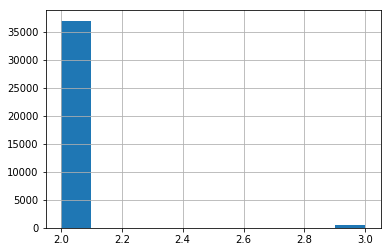

In [129]:
dfraw2[dfraw2.duplicated('id',keep=False)]['id'].value_counts().hist() # some but few triple duplicate rows

In [8]:
dfraw2[dfraw2.duplicated('id',keep=False)]['id'].value_counts() # all duplicates are removed

Series([], Name: id, dtype: int64)

In [9]:
dfraw2['datetime'] = dfraw2['date'].map(datetoTimestamp)

In [67]:
dfraw2.shape

(391144, 10)

In [174]:
# switched to just writing corpus column due to very slow processing time of all posts
f= open("cryptoJustLemma.csv","w+")  
for row_index in dfraw2.index :
    #print(",\n" + getLemofRow(dfraw2.loc[row_index]))
    f.write(getLemofRow(dfraw2.loc[row_index]) + ",\n")
f.close()

In [23]:
dfraw2temp.head()

,index,corpus
0,1,list today tomorrow upcoming event bring upco...
1,2,recovery finally bitcoin ripple xrp ethereum ...
2,3,greedy redd zwvj jpg
3,4,spend usd usd invest gain token price be ath ...
4,5,vechain financial executive report vol medium...


In [24]:
dfraw2.head()

,index,id,date,full_link,subreddit,url,title,author,selftext,datetime
0,0,a701ko,"(2018, 12, 17, 14, 31)",https://www.reddit.com/r/CryptoCurrency/commen...,CryptoCurrency,https://www.reddit.com/r/CryptoCurrency/commen...,List of Today's and Tomorrow's Upcoming Events,cryptocalbot,I will be bringing you upcoming events/announc...,1.545075e+09
1,1,a7026c,"(2018, 12, 17, 14, 29)",https://www.reddit.com/r/CryptoCurrency/commen...,CryptoCurrency,https://insidecryptotoday.com/2018/12/recovery...,"Recovery is finally here – Bitcoin, Ripple’s X...",keeper151515,,1.545075e+09
2,2,a702we,"(2018, 12, 17, 14, 58)",https://www.reddit.com/r/CryptoCurrency/commen...,CryptoCurrency,https://i.redd.it/zwvj7eiqhu421.jpg,Greedy. . .,Hold-and-hope,,1.545077e+09
3,3,a703pb,"(2018, 12, 17, 14, 52)",https://www.reddit.com/r/CryptoCurrency/commen...,CryptoCurrency,https://i.redd.it/ywbc74d5hu421.jpg,"If you spend 1000 USD now, how much (USD) woul...",callmeiguesspotato,,1.545076e+09
4,4,a704ba,"(2018, 12, 17, 14, 2)",https://www.reddit.com/r/CryptoCurrency/commen...,CryptoCurrency,https://medium.com/@vechainofficial/vechain-fi...,VeChain Financial Executive Report Vol. 5,Balleuuh,,1.545073e+09


In [25]:
dfraw2temp = pd.read_csv('cryptoJustLemma.csv')
dfraw2temp.shape # something weird went wrong with extra spaces making two rows being read as one entry

(391144, 2)

In [40]:
dfraw2temp['index'] = dfraw2temp['index'].map(int)

In [42]:
dfraw2.tail()

,index,id,date,full_link,subreddit,url,title,author,selftext,datetime
429111,89223,6xw0np,"(2017, 9, 4, 21, 38)",https://www.reddit.com/r/CryptoCurrency/commen...,CryptoCurrency,https://www.reddit.com/r/CryptoCurrency/commen...,What's the cheapest masternode I can get,[deleted],[removed],1.504575e+09
429112,89224,6xw26k,"(2017, 9, 4, 22, 32)",https://www.reddit.com/r/CryptoCurrency/commen...,CryptoCurrency,https://www.reddit.com/r/CryptoCurrency/commen...,Anyone else heard of the new altcoinexchange?,snittolo,Noticing a lot of the names staring to appear ...,1.504579e+09
429113,89225,6xw340,"(2017, 9, 4, 22, 46)",https://www.reddit.com/r/CryptoCurrency/commen...,CryptoCurrency,https://i.redd.it/p6g2g5u3pqjz.jpg,WTF?,[deleted],[deleted],1.504580e+09
429114,89226,6xw3zs,"(2017, 9, 4, 22, 53)",https://www.reddit.com/r/CryptoCurrency/commen...,CryptoCurrency,https://i.redd.it/w92kgl7wpqjz.png,Multi-Millionaire Dan Bilzerian into Cryptocur...,bizshawn,,1.504580e+09
429115,89227,6xw452,"(2017, 9, 4, 22, 35)",https://www.reddit.com/r/CryptoCurrency/commen...,CryptoCurrency,https://www.gotmonero.com/,Forget Milk... Got Monero?,Bitcoinfriend,,1.504579e+09


In [50]:
dfraw2.reset_index(drop=True, inplace=True)
dfraw2.tail()

,index,id,date,full_link,subreddit,url,title,author,selftext,datetime
391139,89223,6xw0np,"(2017, 9, 4, 21, 38)",https://www.reddit.com/r/CryptoCurrency/commen...,CryptoCurrency,https://www.reddit.com/r/CryptoCurrency/commen...,What's the cheapest masternode I can get,[deleted],[removed],1.504575e+09
391140,89224,6xw26k,"(2017, 9, 4, 22, 32)",https://www.reddit.com/r/CryptoCurrency/commen...,CryptoCurrency,https://www.reddit.com/r/CryptoCurrency/commen...,Anyone else heard of the new altcoinexchange?,snittolo,Noticing a lot of the names staring to appear ...,1.504579e+09
391141,89225,6xw340,"(2017, 9, 4, 22, 46)",https://www.reddit.com/r/CryptoCurrency/commen...,CryptoCurrency,https://i.redd.it/p6g2g5u3pqjz.jpg,WTF?,[deleted],[deleted],1.504580e+09
391142,89226,6xw3zs,"(2017, 9, 4, 22, 53)",https://www.reddit.com/r/CryptoCurrency/commen...,CryptoCurrency,https://i.redd.it/w92kgl7wpqjz.png,Multi-Millionaire Dan Bilzerian into Cryptocur...,bizshawn,,1.504580e+09
391143,89227,6xw452,"(2017, 9, 4, 22, 35)",https://www.reddit.com/r/CryptoCurrency/commen...,CryptoCurrency,https://www.gotmonero.com/,Forget Milk... Got Monero?,Bitcoinfriend,,1.504579e+09


In [59]:
df2['index_x'].value_counts().head(111)
len(set(df2['id']))

391144

In [52]:
df2 = pd.merge(dfraw2, dfraw2temp, left_index=True, right_index=True)

In [63]:
df2 = df2.rename({'index_y':'index'},axis=1)
df2 = df2.rename({'full_link':'permalink'},axis=1)

In [66]:
df2[['index','datetime','corpus','permalink','author']].to_csv('cryptocurrencyLemma.csv')

In [64]:
df2.head(35)

,index_x,id,date,permalink,subreddit,url,title,author,selftext,datetime,index,corpus
0,0,a701ko,"(2018, 12, 17, 14, 31)",https://www.reddit.com/r/CryptoCurrency/commen...,CryptoCurrency,https://www.reddit.com/r/CryptoCurrency/commen...,List of Today's and Tomorrow's Upcoming Events,cryptocalbot,I will be bringing you upcoming events/announc...,1.545075e+09,0,list today tomorrow upcoming event bring upco...
1,1,a7026c,"(2018, 12, 17, 14, 29)",https://www.reddit.com/r/CryptoCurrency/commen...,CryptoCurrency,https://insidecryptotoday.com/2018/12/recovery...,"Recovery is finally here – Bitcoin, Ripple’s X...",keeper151515,,1.545075e+09,1,recovery finally bitcoin ripple xrp ethereum ...
2,2,a702we,"(2018, 12, 17, 14, 58)",https://www.reddit.com/r/CryptoCurrency/commen...,CryptoCurrency,https://i.redd.it/zwvj7eiqhu421.jpg,Greedy. . .,Hold-and-hope,,1.545077e+09,2,greedy redd zwvj jpg
3,3,a703pb,"(2018, 12, 17, 14, 52)",https://www.reddit.com/r/CryptoCurrency/commen...,CryptoCurrency,https://i.redd.it/ywbc74d5hu421.jpg,"If you spend 1000 USD now, how much (USD) woul...",callmeiguesspotato,,1.545076e+09,3,spend usd usd invest gain token price be ath ...
4,4,a704ba,"(2018, 12, 17, 14, 2)",https://www.reddit.com/r/CryptoCurrency/commen...,CryptoCurrency,https://medium.com/@vechainofficial/vechain-fi...,VeChain Financial Executive Report Vol. 5,Balleuuh,,1.545073e+09,4,vechain financial executive report vol medium...
5,5,a704in,"(2018, 12, 17, 14, 46)",https://www.reddit.com/r/CryptoCurrency/commen...,CryptoCurrency,https://medium.com/@cryptotownio/dec-16-2018-u...,Dec 16 2018 Upcoming Crypto Events,h214289,,1.545076e+09,5,dec upcoming crypto event medium cryptotownio...
6,6,a70558,"(2018, 12, 17, 14, 9)",https://www.reddit.com/r/CryptoCurrency/commen...,CryptoCurrency,https://youtu.be/Va2m6ePNVqM,One of the biggest problem in the space is the...,Kain_niaK,,1.545074e+09,6,big problem space lack decentralize exchange ...
7,7,a7056x,"(2018, 12, 17, 14, 18)",https://www.reddit.com/r/CryptoCurrency/commen...,CryptoCurrency,https://www.reddit.com/r/CryptoCurrency/commen...,The stock market will save us all,vovr,50% of the sp500 is in bear market. It looks l...,1.545074e+09,7,stock market save bear market look drop gues...
8,8,a705by,"(2018, 12, 17, 14, 48)",https://www.reddit.com/r/CryptoCurrency/commen...,CryptoCurrency,https://odeybit.com/egypts-central-bank-conduc...,Egypt’s Central Bank Conducting ‘Feasibility S...,odeybit,,1.545076e+09,8,egypt central bank conduct feasibility study ...
9,9,a705iv,"(2018, 12, 17, 14, 32)",https://www.reddit.com/r/CryptoCurrency/commen...,CryptoCurrency,https://i.redd.it/n6g0zhlfju421.jpg,I am glad that this company shares its achieve...,Krista111,,1.545075e+09,9,glad company share achievement aware update ...
